In [65]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# EDA Steps

## 1. Understanding of Data

In [2]:
df_churn=pd.read_csv(r"C:\Business Analyst Doc\Capstone Project\Churn modelling_ABADS\Dataset.csv")

In [3]:
df_churn.head()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1

In [4]:
df_churn

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
...     ...           ...              ...       ...        ...   
3328      0           192                1         1       2.67   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0        9.87      10.0  
1                 1    161.6       123           82.0        9.78      13.7  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
...             ...      ...       ...            ...         ...       ...  
3328              2    156.2        77           71.7       10.78       9.9  
3329              3    231.1        57           56.4        7.67       9.6  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  
3332              0    234.4       113          100.0       13.30      13.7  

[3333 rows x 11 columns]

In [5]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


## 2. Missing Values

In [6]:
# Step 1: Handling Missing Values
# Checking for missing values
missing_values = df_churn.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64


#### "There are no Missing Values in Dataset"

## 3. Descriptive Statistics

In [8]:
df_churn.describe().T

count        mean        std   min     25%     50%     75%  \
Churn            3333.0    0.144914   0.352067   0.0    0.00    0.00    0.00   
AccountWeeks     3333.0  101.064806  39.822106   1.0   74.00  101.00  127.00   
ContractRenewal  3333.0    0.903090   0.295879   0.0    1.00    1.00    1.00   
DataPlan         3333.0    0.276628   0.447398   0.0    0.00    0.00    1.00   
DataUsage        3333.0    0.816475   1.272668   0.0    0.00    0.00    1.78   
CustServCalls    3333.0    1.562856   1.315491   0.0    1.00    1.00    2.00   
DayMins          3333.0  179.775098  54.467389   0.0  143.70  179.40  216.40   
DayCalls         3333.0  100.435644  20.069084   0.0   87.00  101.00  114.00   
MonthlyCharge    3333.0   56.305161  16.426032  14.0   45.00   53.50   66.20   
OverageFee       3333.0   10.051488   2.535712   0.0    8.33   10.07   11.77   
RoamMins         3333.0   10.237294   2.791840   0.0    8.50   10.30   12.10   

                    max  
Churn              1.00  
AccountWeeks     243.00  
ContractRenewal    1.00  
DataPlan           1.00  
DataUsage          5.40  
CustServCalls      9.00  
DayMins          350.80  
DayCalls         165.00  
MonthlyCharge    111.30  
OverageFee        18.19  
RoamMins          20.00

### Interpretaion of Mean, Median, Mode

- 1.Churn:
    - Mean: Approximately 14.5% of customers churned.
    - Standard Deviation: There's moderate variability in the churn rate.
    - Min/Max: Churn variable is binary (0 or 1), indicating whether a customer churned or not.
- 2.AccountWeeks:
    - Mean: The average number of weeks a customer has had an active account is approximately 101.
    - Standard Deviation: There's moderate variability in the number of weeks customers have had active accounts.
    - Min/Max: Customers have had active accounts for a minimum of 1 week and a maximum of 243 weeks.
- 3.ContractRenewal, DataPlan:
    - These are binary variables indicating whether a customer renewed their contract or has a data plan.
    - Mean: Approximately 90.3% of customers recently renewed their contract, and about 27.7% have a data plan. 
- 4.DataUsage:
    - Mean: The average monthly data usage is approximately 0.82 gigabytes.
    - Standard Deviation: There's moderate variability in monthly data usage.
    - Min/Max: Monthly data usage ranges from 0 to 5.4 gigabytes.
- 5.CustServCalls:
    - Mean: The average number of customer service calls is approximately 1.56.
    - Standard Deviation: There's moderate variability in the number of customer service calls.
    - Min/Max: Customers made a minimum of 0 calls and a maximum of 9 calls to customer service.
- 6.DayMins:
    - Mean: The average daytime minutes per month is approximately 179.8.
    - andard Deviation: There's moderate variability in daytime minutes.
    - n/Max: Daytime minutes range from 0 to 350.8 minutes per month.
- 7. DayCalls:
    - Mean: The average number of daytime calls is approximately 100.4.
    - Standard Deviation: There's moderate variability in the number of daytime calls.
    - Min/Max: Daytime calls range from 0 to 165 calls.
- 8.MonthlyCharge:
    - Mean: The average monthly bill is approximately 56.31.
    - Standard Deviation: There's moderate variability in monthly charges.
    - Min/Max: Monthly charges range from 14.00 to 111.30.
- 9.OverageFee:
    - Mean: The average largest overage fee in the last 12 months is approximately 10.05.
    - Standard Deviation: There's moderate variability in overage fees.
    - Min/Max: Overage fees range from 0.00 to 18.19.
- 10.RoamMins:
    - Mean: The average number of roaming minutes is approximately 10.24.
    - Standard Deviation: There's moderate variability in roaming minutes.
    - Min/Max: Roaming minutes range from 0 to 20 minutes.


## 4. Data Visualization

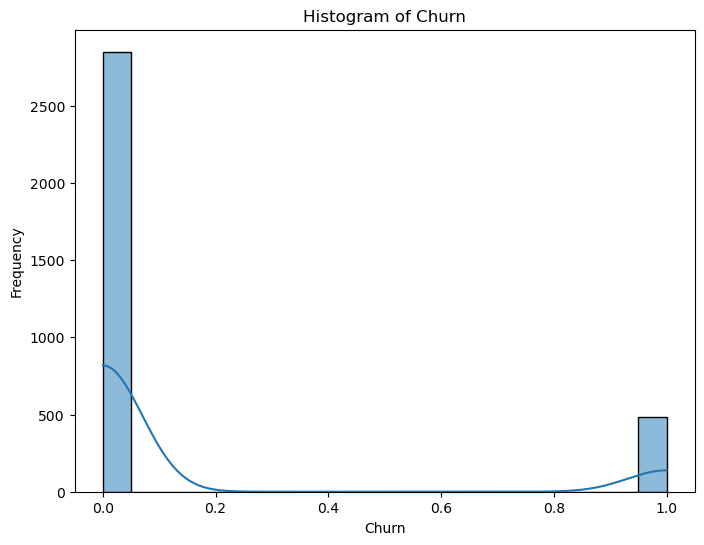

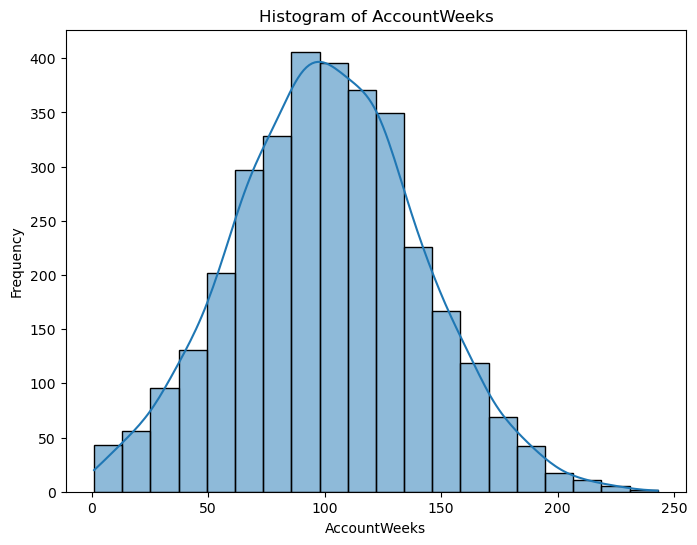

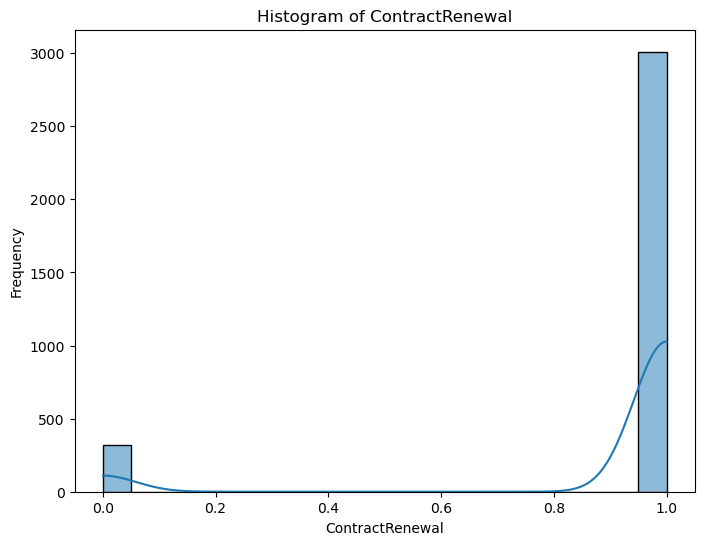

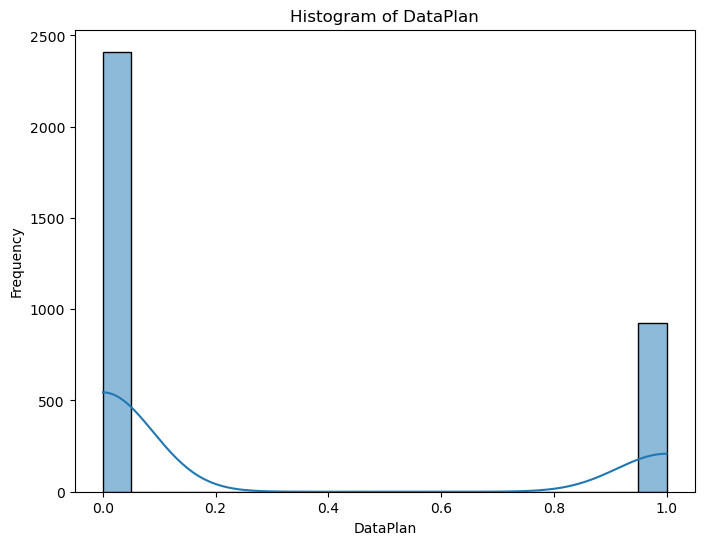

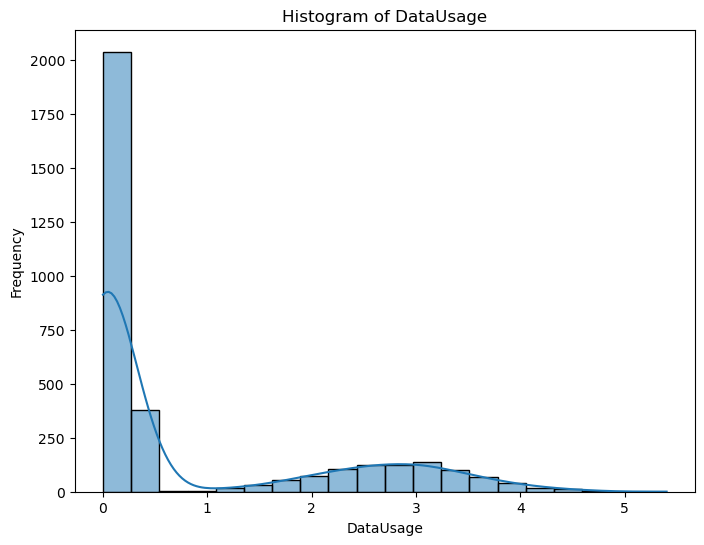

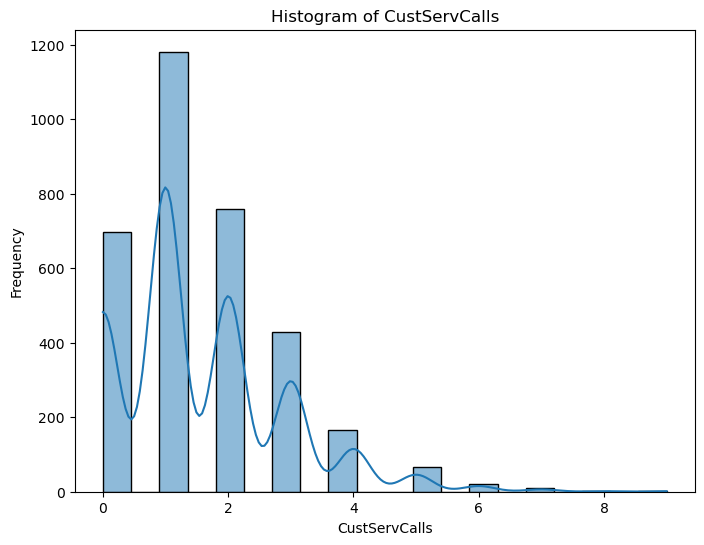

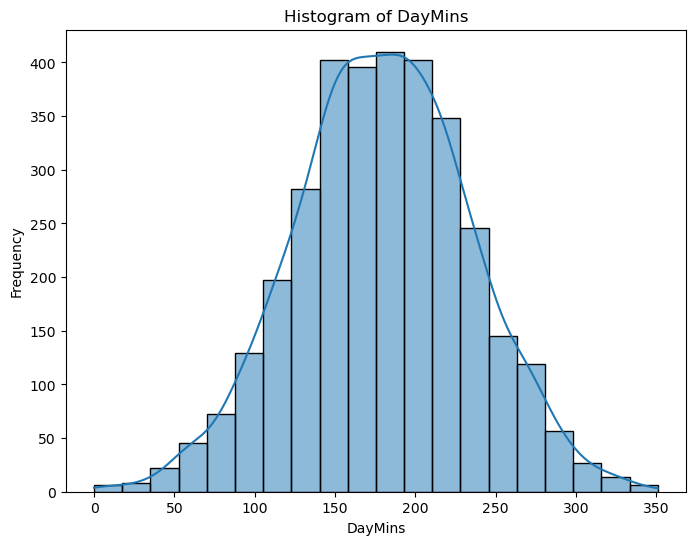

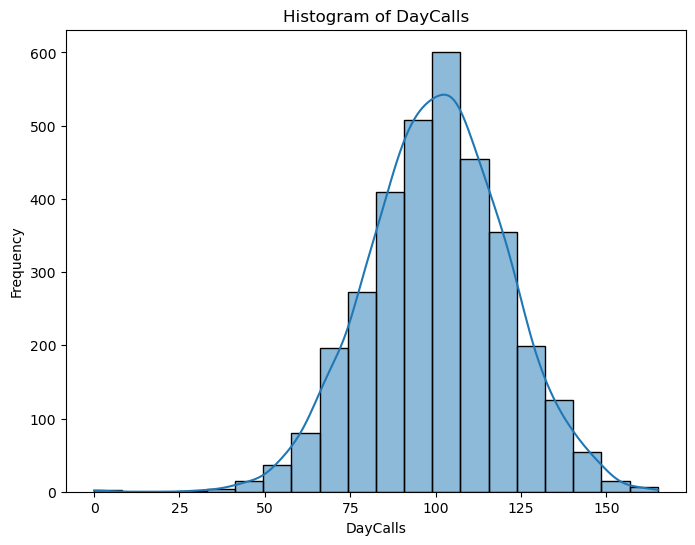

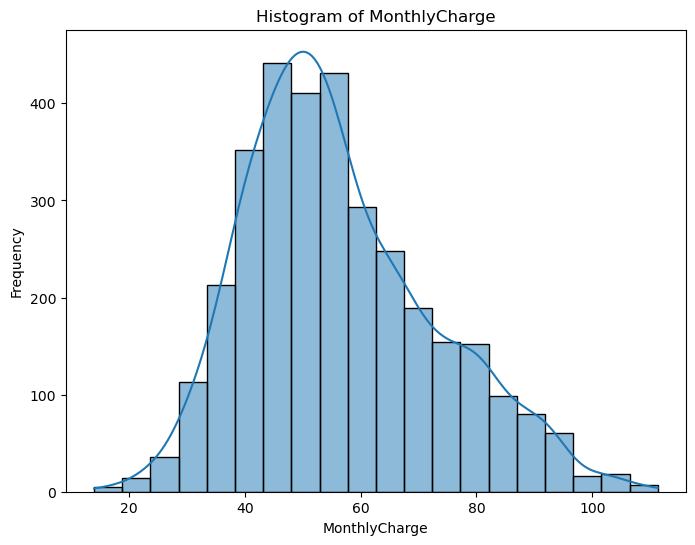

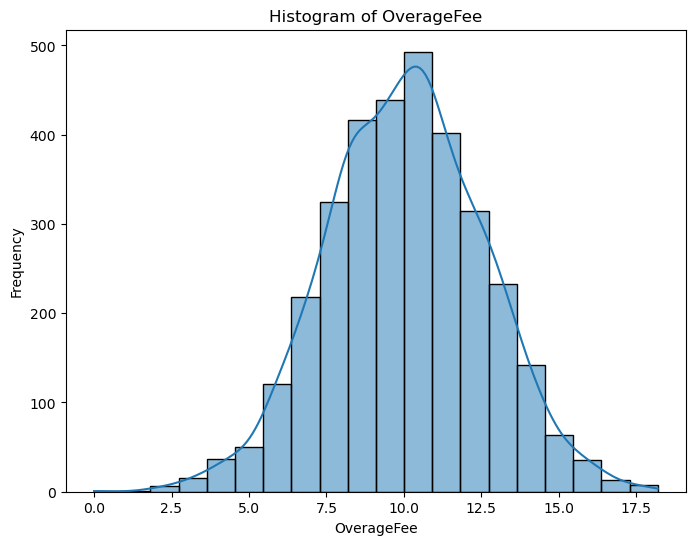

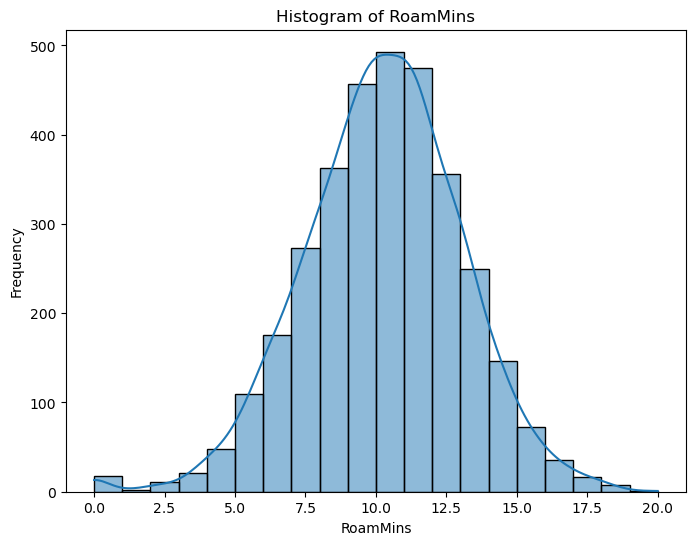

In [10]:
# Histograms for numerical features
numerical_features = df_churn.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_churn, x=feature, bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

#### Interpretation of Distribution of data

1. AccountWeeks -  Positive skewed.
2. DataUsage - Positive skewed.
3. CustServCalls - Rightly Positive skewed.
4. DayMins - Symetrical Distribution
5. DayCalls - Negative Skewed
6. MonthlyCharge - Positive Skewed
7. OverageFee - Negative Skewed
8. RoamMins - Symetrical Distribution

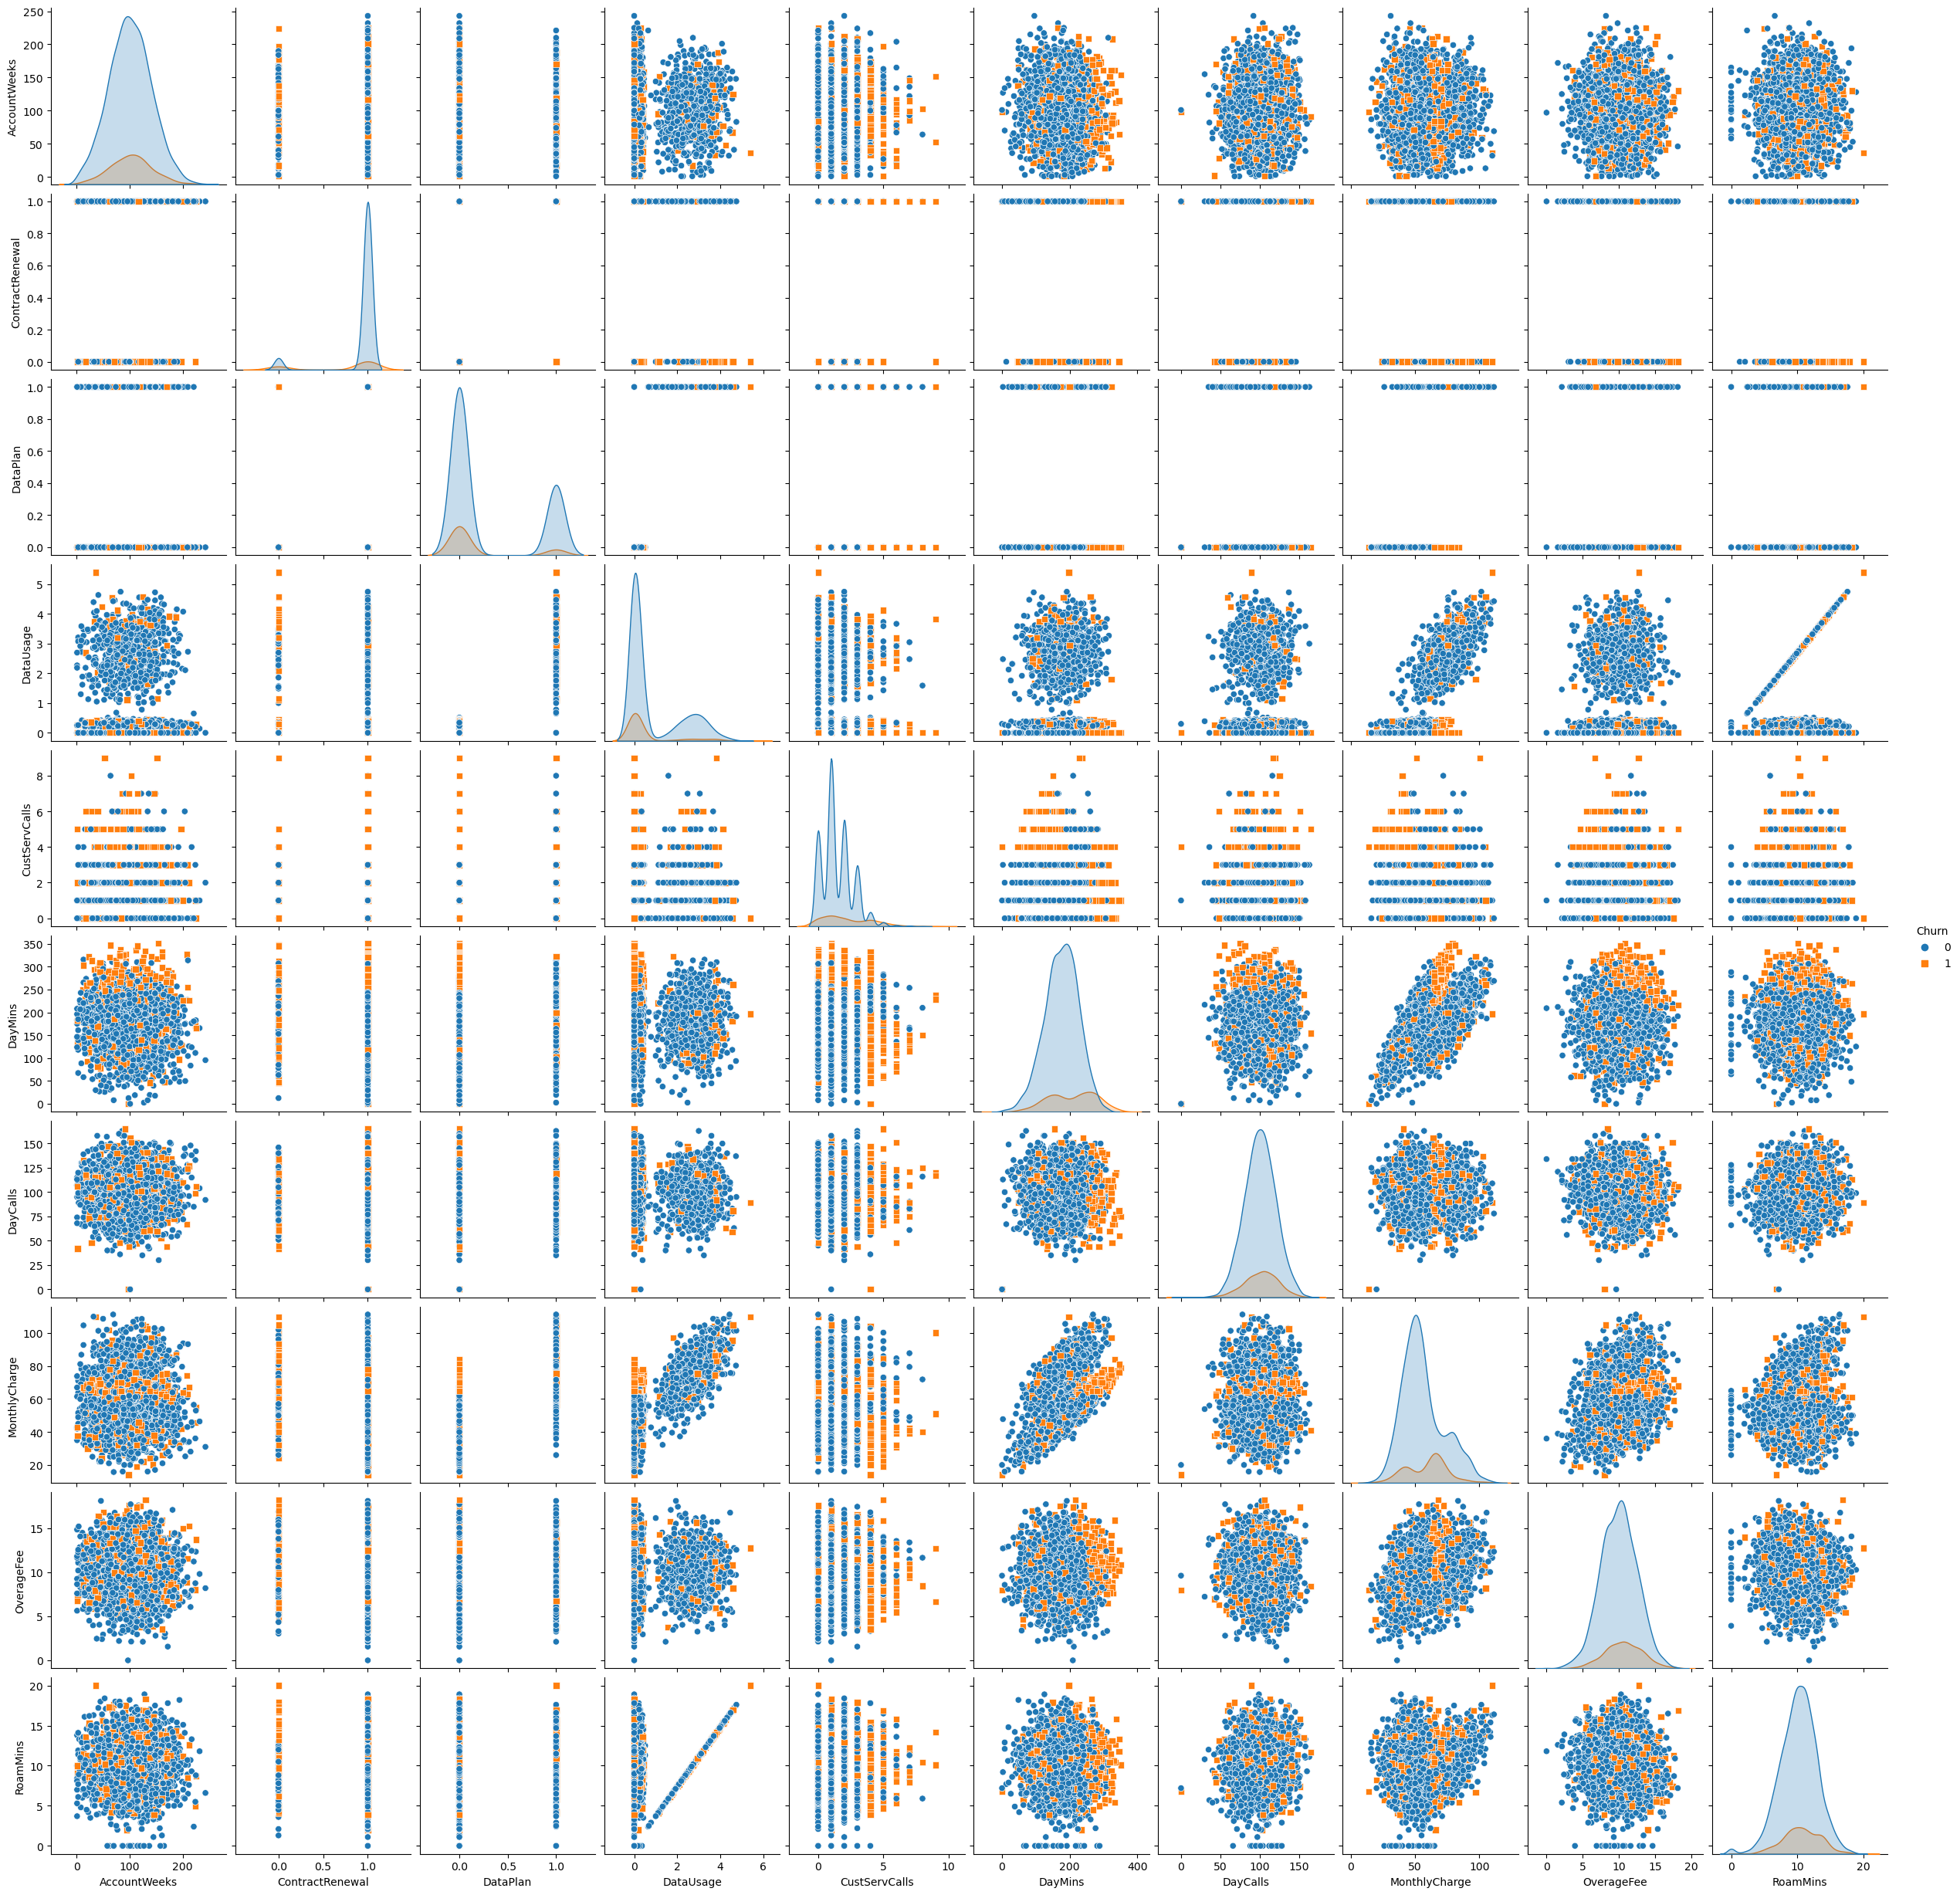

In [11]:
# Pairwise relationships using pairplot
sns.pairplot(df_churn, diag_kind='kde', hue='Churn', markers=['o', 's'])
plt.show()

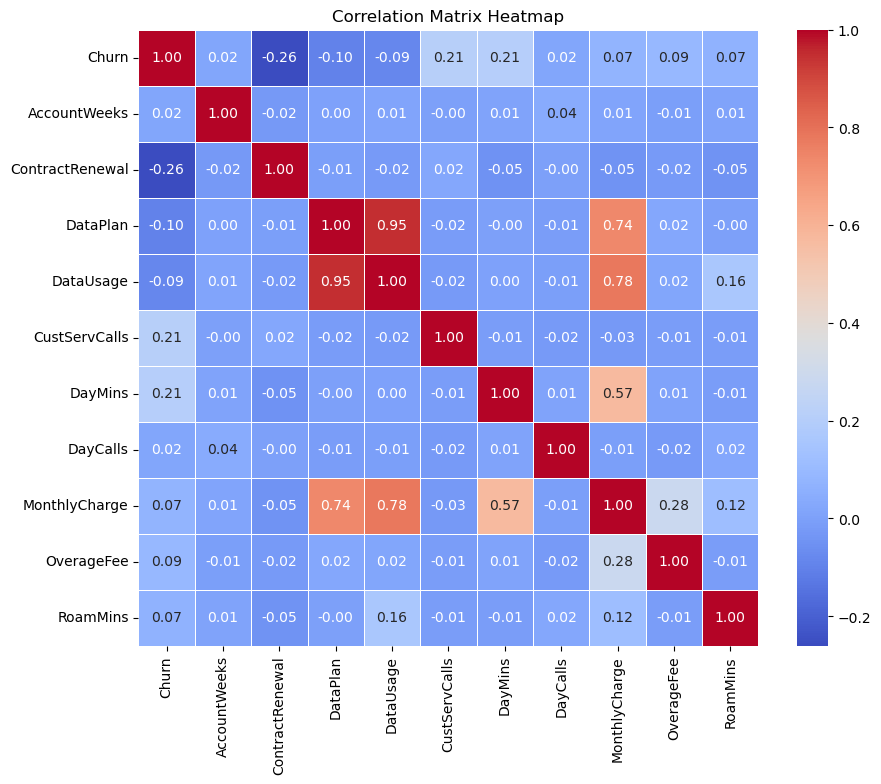

In [12]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_churn.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### 1. " in above heatmap variable MonthlyCharge is highly correlated to variable DataPlan, DataUsage and DayMins"
####  2. " Also DataUsage and DataPlan are also highly Correlated with each other."

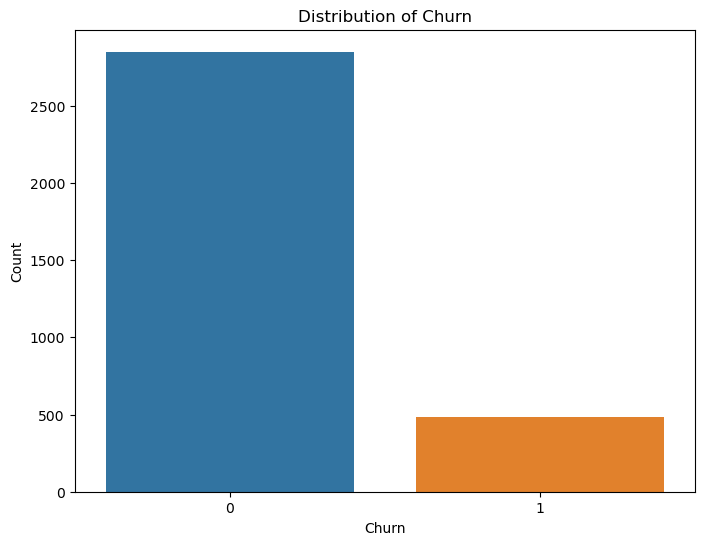

In [13]:
# Visualize distribution of the target variable (Churn)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_churn, x='Churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

- In above graph, Non churn Customers (0) count is 2850 and churn customers (1) count is 483. As of now, non churn customers are satisfied with telecom service company.  

## 5. Feature Analysis

In [15]:
# Correlation analysis between numerical features and Churn
correlation_with_churn = df_churn.corr()['Churn'].sort_values(ascending=False)
correlation_with_churn = correlation_with_churn.drop('Churn')  # Remove correlation with itself
print("Correlation of numerical features with Churn:")
print(correlation_with_churn)

Correlation of numerical features with Churn:
CustServCalls      0.208750
DayMins            0.205151
OverageFee         0.092812
MonthlyCharge      0.072313
RoamMins           0.068239
DayCalls           0.018459
AccountWeeks       0.016541
DataUsage         -0.087195
DataPlan          -0.102148
ContractRenewal   -0.259852
Name: Churn, dtype: float64


#### interpretation of feature analysis
- Positive Correlation:
    - CustServCalls and DayMins have a moderate positive correlation with Churn, indicating that higher values of these features 
      are associated with a higher likelihood of churn.
    - OverageFee, MonthlyCharge, and RoamMins have weak positive correlations with Churn, suggesting a slight increase in churn 
      as these features increase.
- Negative Correlation:
    - DataUsage and DataPlan have weak negative correlations with Churn, indicating that higher data usage and having a data 
      plan are associated with a slightly lower likelihood of churn.
    - ContractRenewal has a moderate negative correlation with Churn, suggesting that customers who recently renewed their 
      contract are less likely to churn.
- Weak Correlation:
    - DayCalls and AccountWeeks have very weak correlations with Churn, suggesting that they have little influence on churn 
    behavior.


## 6. Outliers

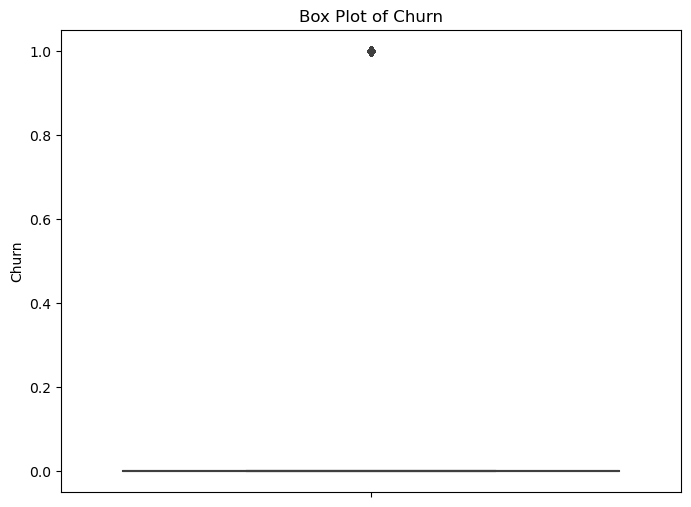

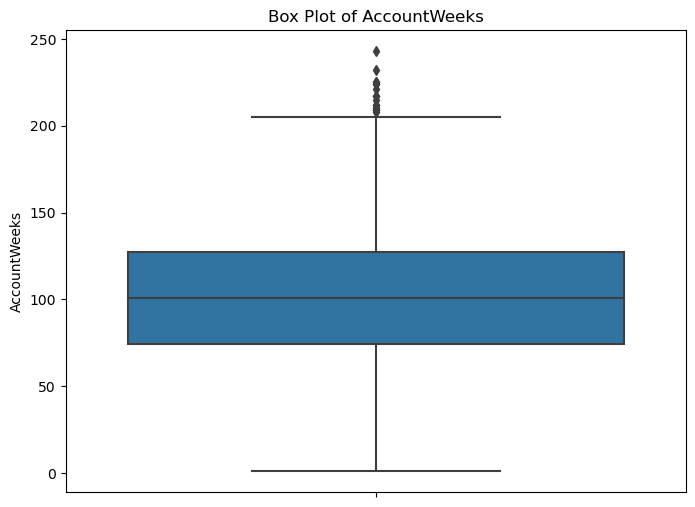

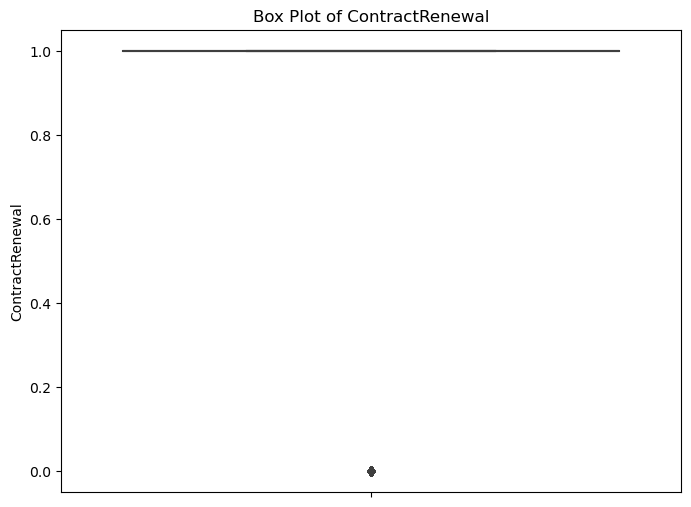

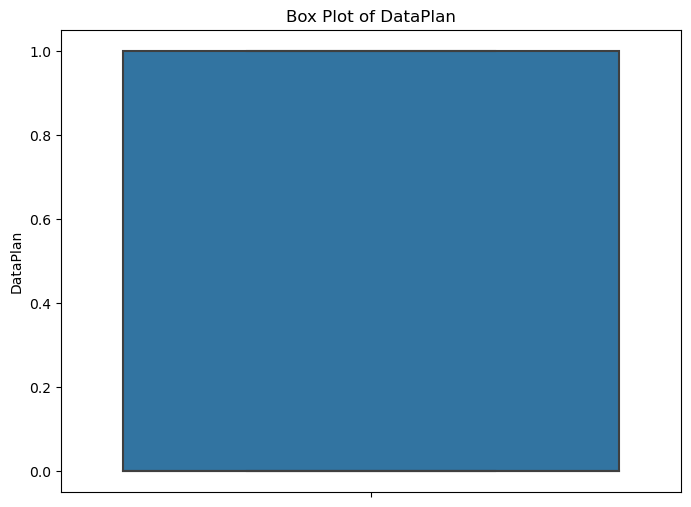

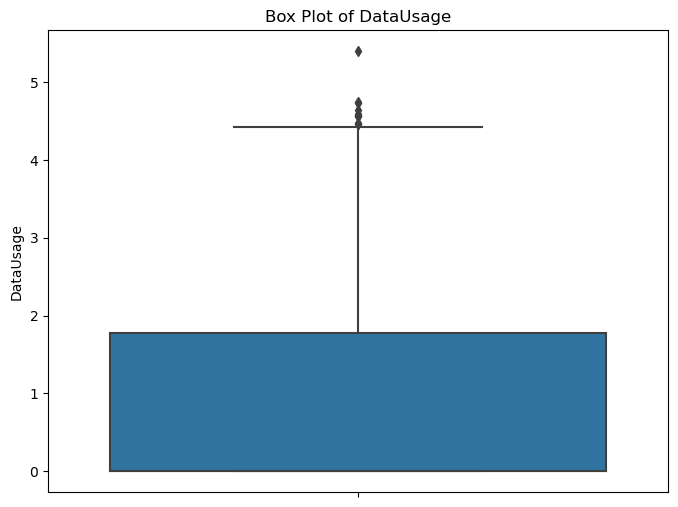

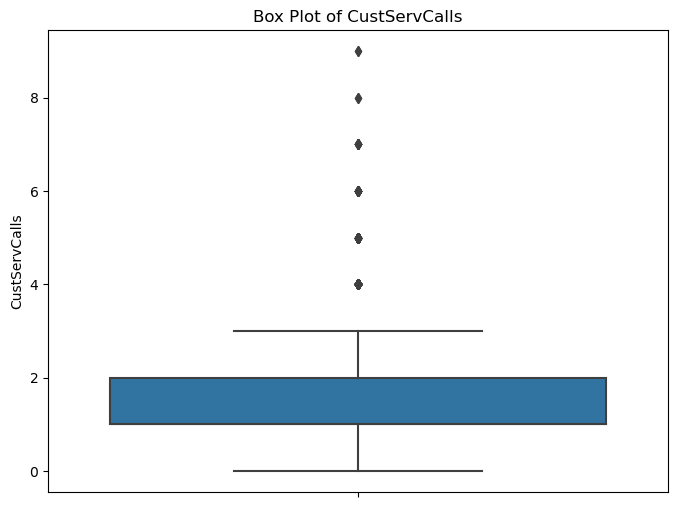

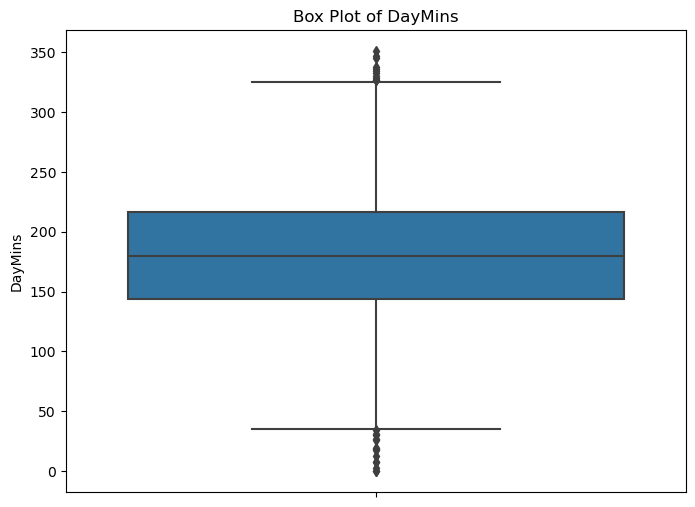

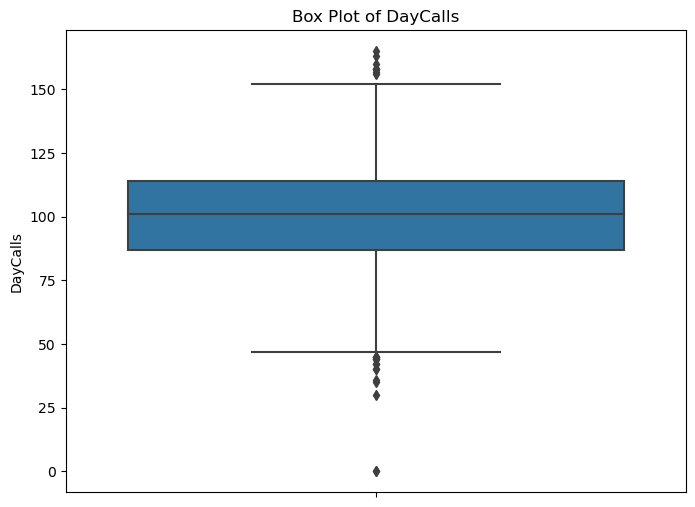

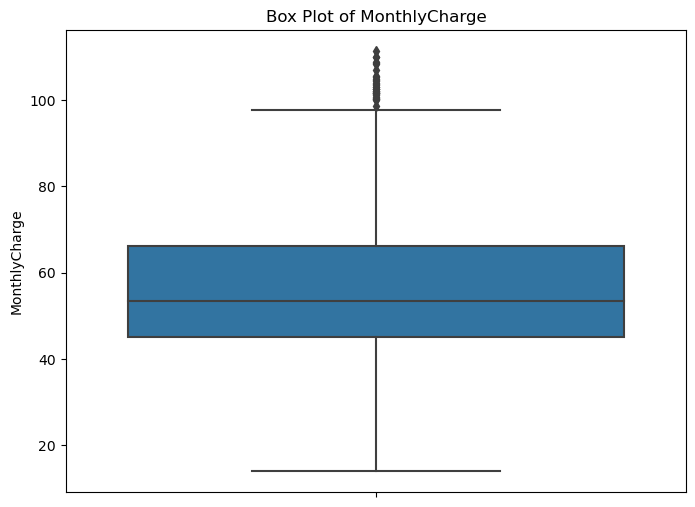

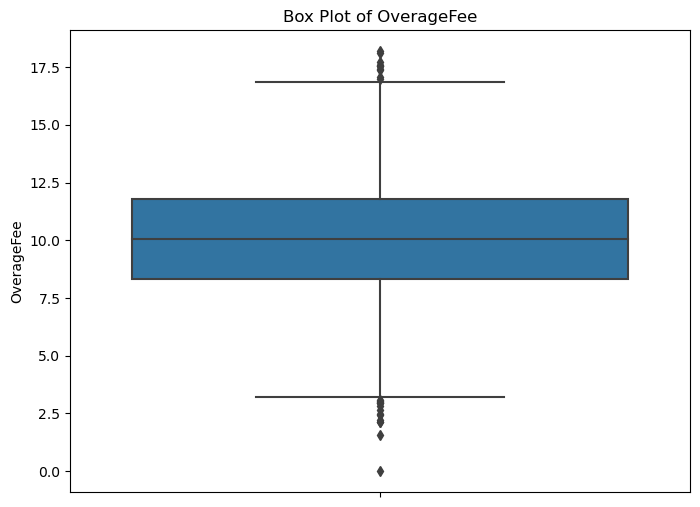

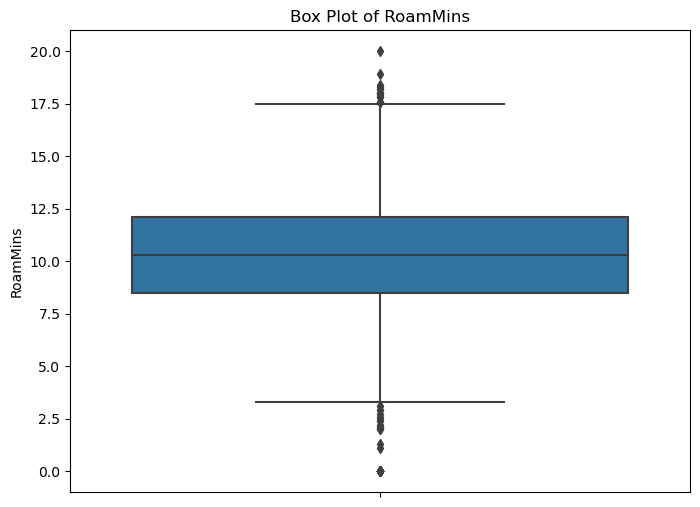

In [17]:
# Step 2 - Finding outliers
# Define numerical features
numerical_cols = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']

# Visual Inspection - Box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_churn, y=feature)
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.show()

#### There are ouliers present in AccountWeeks, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee and RoamMins

Preprocessed Dataset after Outlier Handling:
    Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0       10.07       6.6  
4    166.7       113           41.0        7.42      10.1  


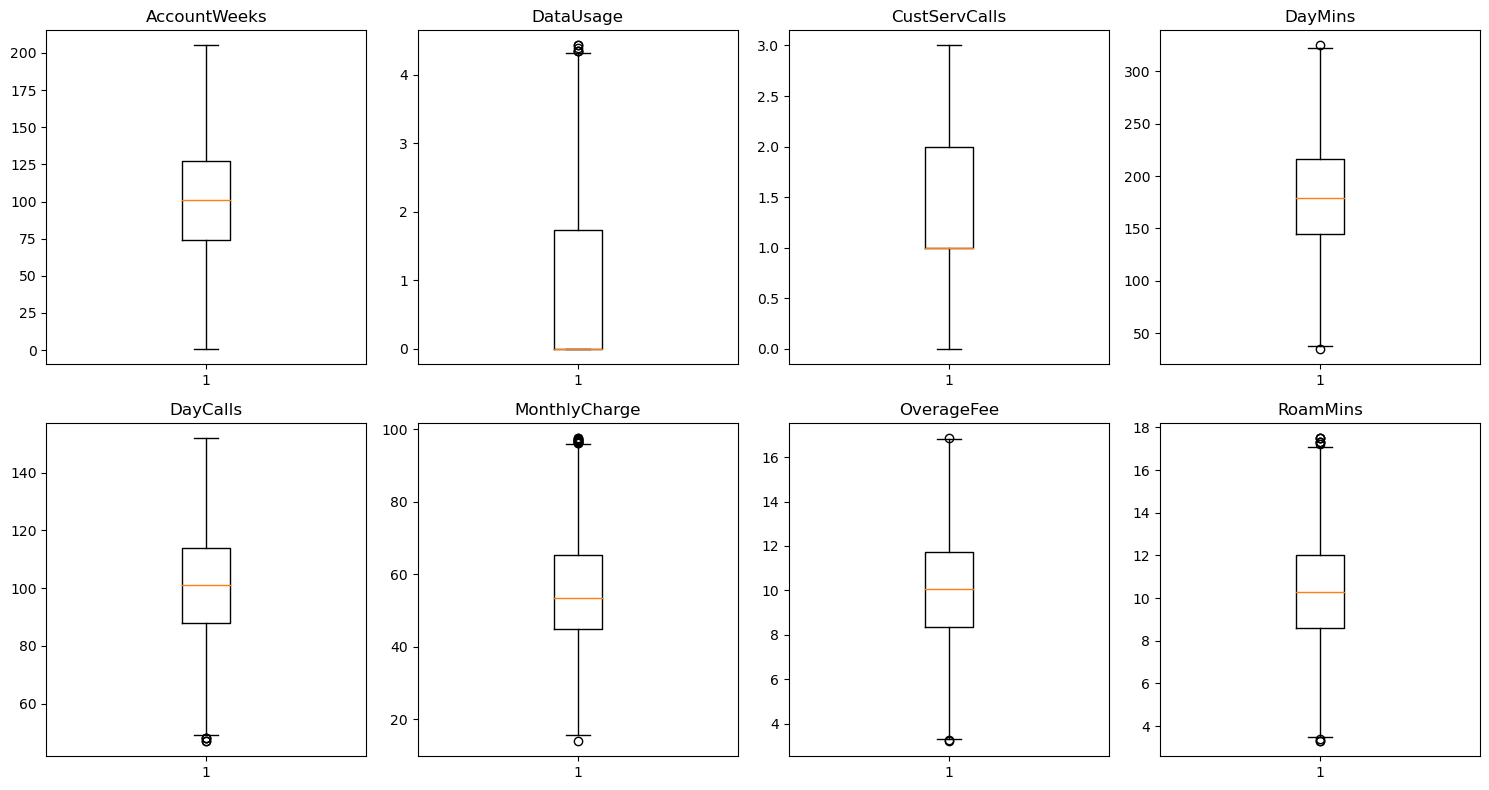

In [18]:
# Function to handle outliers using IQR method
def handle_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[col] < lower_bound) | (data[col] > upper_bound)
    # Replace outliers with median value
    data.loc[outliers, col] = data[col].median()

# Handle outliers for each numerical column
for col in numerical_cols:
    handle_outliers_iqr(df_churn, col)

# Display the preprocessed dataset after handling outliers
print("Preprocessed Dataset after Outlier Handling:\n", df_churn.head())

# Plot box plots for numerical features to visualize outliers after handling
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df_churn[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Feature Engineering

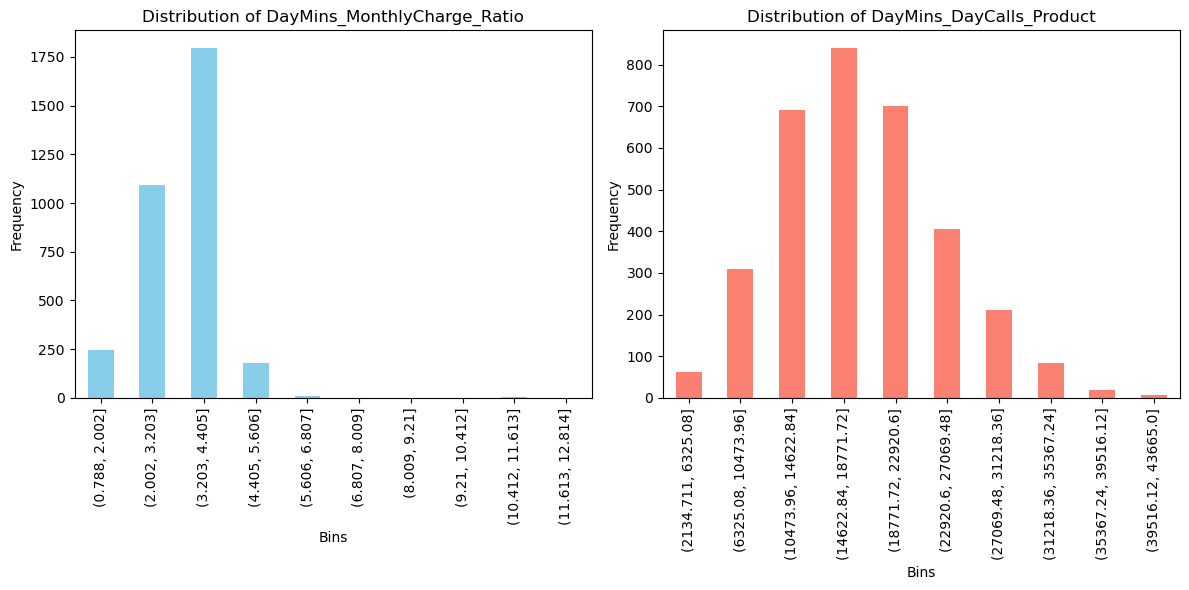

In [24]:
# Create new features
df_churn['DayMins_MonthlyCharge_Ratio'] = df_churn['DayMins'] / df_churn['MonthlyCharge']
df_churn['DayMins_DayCalls_Product'] = df_churn['DayMins'] * df_churn['DayCalls']

# Discretize continuous features into bins
df_churn['DayMins_MonthlyCharge_Ratio_Bins'] = pd.cut(df_churn['DayMins_MonthlyCharge_Ratio'], bins=10)
df_churn['DayMins_DayCalls_Product_Bins'] = pd.cut(df_churn['DayMins_DayCalls_Product'], bins=10)

# Plot bar plots for binned features
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df_churn['DayMins_MonthlyCharge_Ratio_Bins'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of DayMins_MonthlyCharge_Ratio')
plt.xlabel('Bins')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df_churn['DayMins_DayCalls_Product_Bins'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Distribution of DayMins_DayCalls_Product')
plt.xlabel('Bins')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### DayMins_MonthlyCharge_Ratio: 
 - This feature represents the ratio of daytime minutes to monthly charge for each customer.
 - The objective behind creating this feature is to identify if there is any correlation or pattern between the amount of      daytime usage (represented by DayMins) and the monthly charge incurred by the customer.
 
#### DayMins_DayCalls_Product:
- This feature is the product of daytime minutes and daytime calls for each customer.
- By multiplying these two features, we aim to capture the overall activity or engagement level of customers during daytime hours.


In [30]:
df_churn.head()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  \
0    265.1       110           89.0        9.87      10.0   
1    161.6       123           82.0        9.78      13.7   
2    243.4       114           52.0        6.06      12.2   
3    299.4        71           57.0       10.07       6.6   
4    166.7       113           41.0        7.42      10.1   

   DayMins_MonthlyCharge_Ratio  DayMins_DayCalls_Product  \
0                     2.978652                   29161.0   
1                     1.970732                   19876.8   
2                     4.680769                   27747.6   
3                     5.252632                   21257.4   
4                     4.065854                   18837.1   

  DayMins_MonthlyCharge_Ratio_Bins DayMins_DayCalls_Product_Bins  
0                   (2.002, 3.203]          (27069.48, 31218.36]  
1                   (0.788, 2.002]           (18771.72, 22920.6]  
2                   (4.405, 5.606]          (27069.48, 31218.36]  
3                   (4.405, 5.606]           (18771.72, 22920.6]  
4                   (3.203, 4.405]           (18771.72, 22920.6]

# Model Building

## Task 1. a. Bi-variate Plot

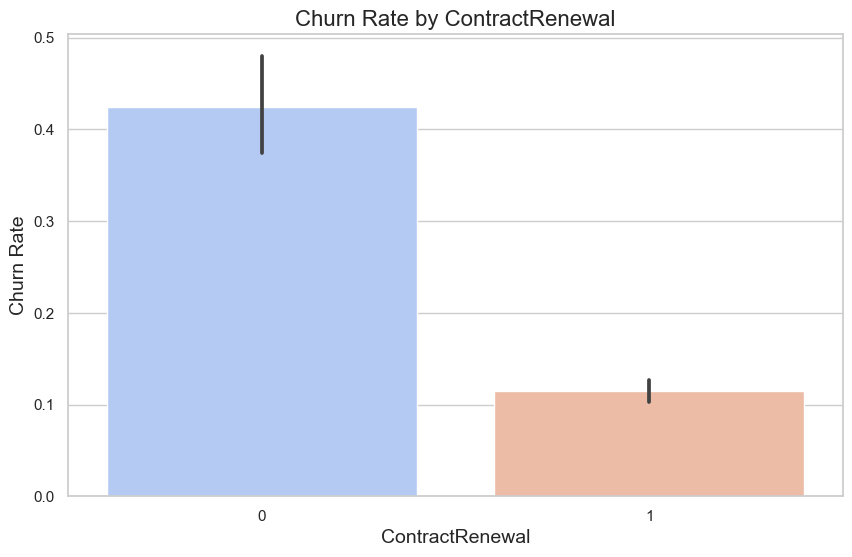

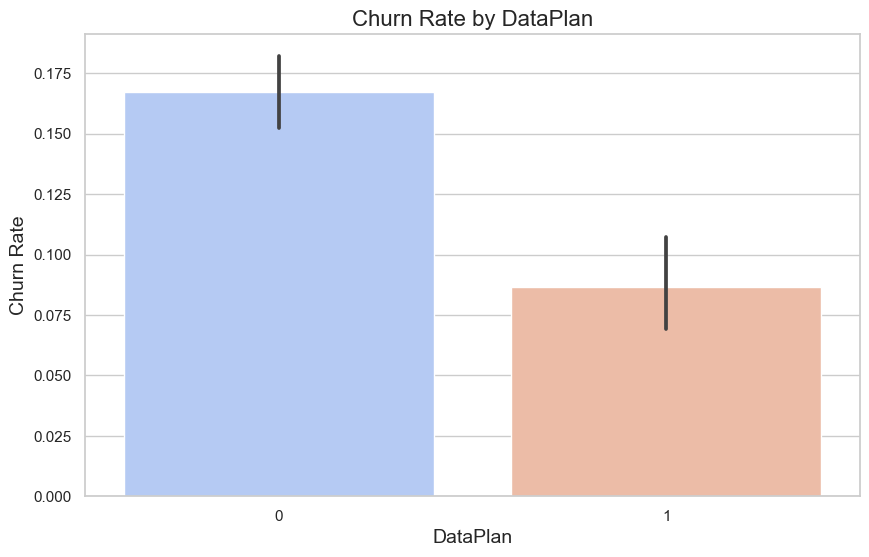

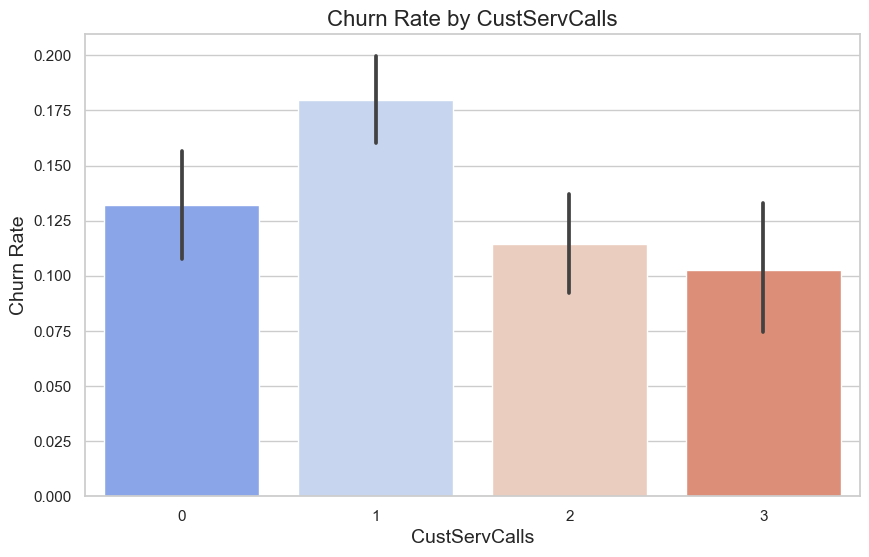

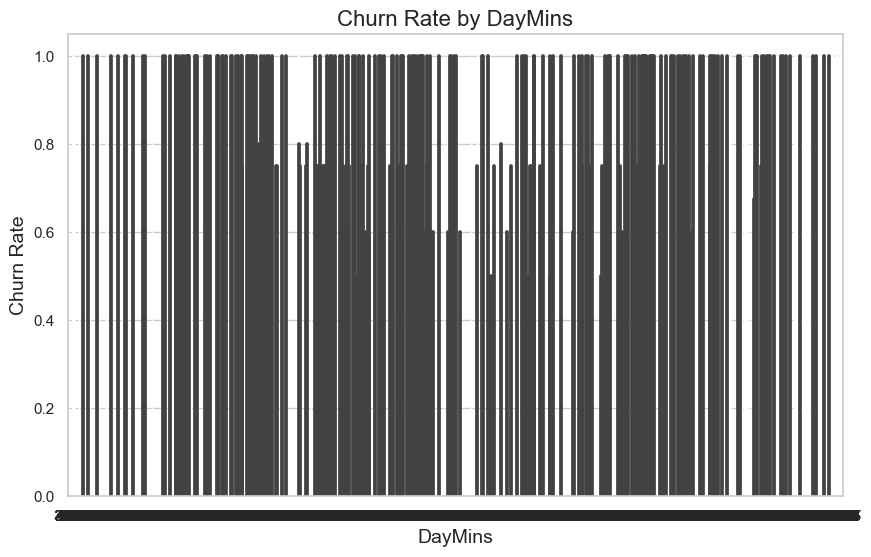

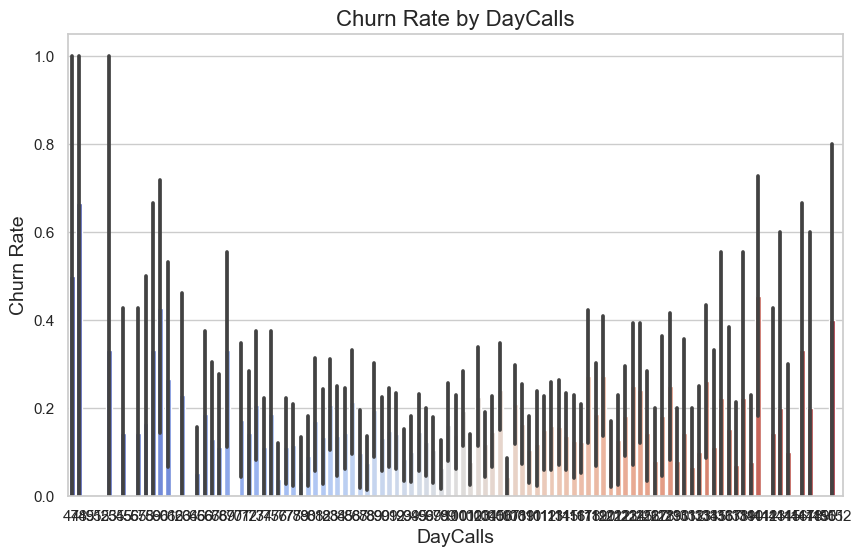

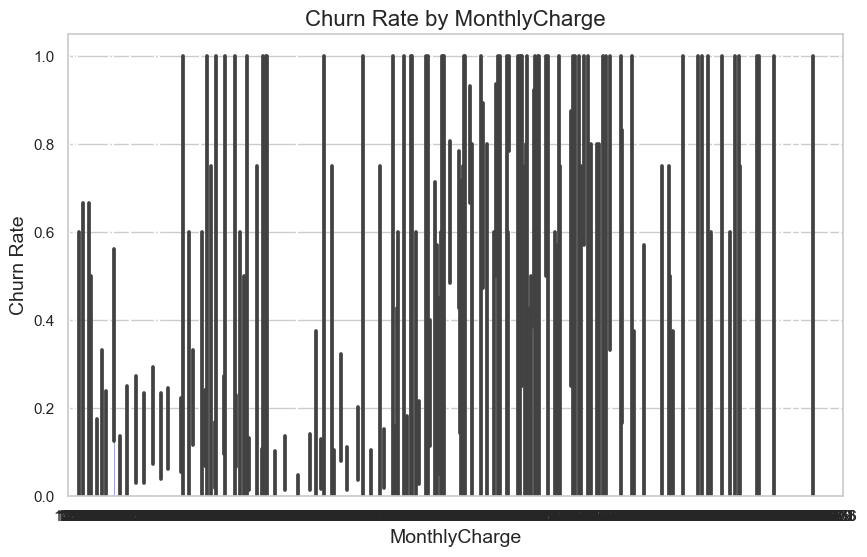

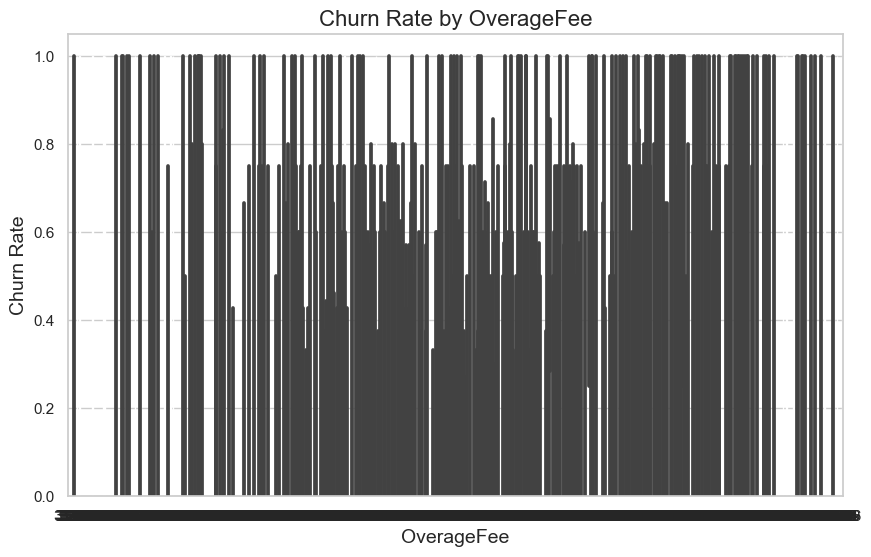

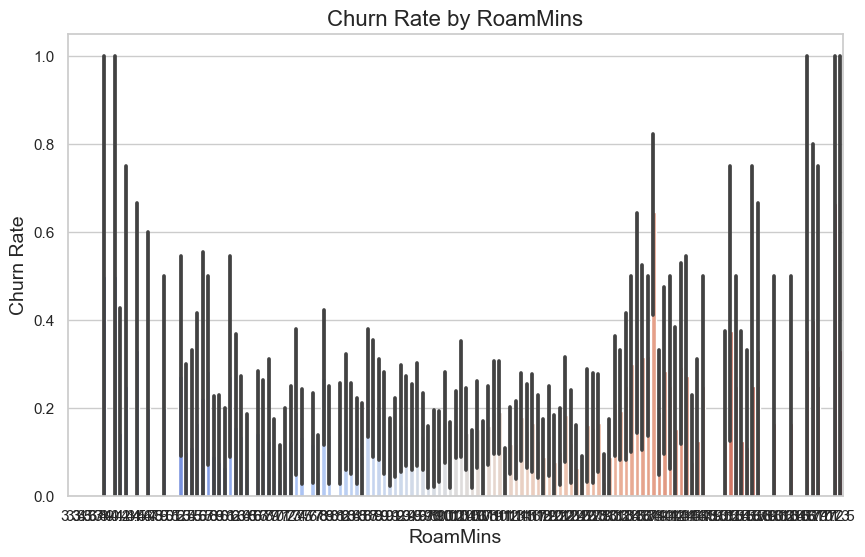

In [28]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Define a function to plot bar plots
def plot_barplots(df, x_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_var, y='Churn', data=df, palette='coolwarm')
    plt.title(f'Churn Rate by {x_var}', fontsize=16)
    plt.xlabel(x_var, fontsize=14)
    plt.ylabel('Churn Rate', fontsize=14)
    plt.show()

# Generate bar plots for each meaningful variable with Churn
meaningful_variables = ['ContractRenewal', 'DataPlan', 'CustServCalls', 'DayMins', 'DayCalls', 
                        'MonthlyCharge', 'OverageFee', 'RoamMins']

for var in meaningful_variables:
    plot_barplots(df_churn, var)

### Interppretation of all variables by churn

- Churn rate by ContractRenewal - the bar chart demonstrates a noticeable difference in churn rates between customers with and without contract renewals, with those without contract renewals exhibiting a significantly higher churn rate compared to those who have renewed their contracts.
- Churn Rate by DataPlan - the bar chart highlights a noticeable difference in churn rates between customers with and without a data plan, with those without a data plan showing a significantly higher churn rate compared to those with a data plan.
- Churn Rate by CustServCalls - the bar chart demonstrates a variation in churn rates based on the number of customer service calls, with customers who make one call exhibiting the highest churn rate, followed by those who make no calls, two calls, and three calls, respectively.
- As variable DayMins, Daycalls,MonthlyCharge, OverageFee,RoamMins graphs are categorized or bined in low, average and high.


In [32]:
# Define functions to categorize numerical values into 'Low', 'Average', and 'High' based on predefined ranges
def categorize_day_mins(value):
    if value <= 100:
        return 'Low'
    elif 101 <= value <= 200:
        return 'Average'
    else:
        return 'High'

def categorize_day_calls(value):
    if value <= 50:
        return 'Low'
    elif 51 <= value <= 100:
        return 'Average'
    else:
        return 'High'

def categorize_monthly_charge(value):
    if value <= 40.0:
        return 'Low'
    elif 40.1 <= value <= 70.0:
        return 'Average'
    else:
        return 'High'

def categorize_overage_fee(value):
    if value <= 8.0:
        return 'Low'
    elif 8.1 <= value <= 14.0:
        return 'Average'
    else:
        return 'High'

def categorize_roam_mins(value):
    if value <= 10.0:
        return 'Low'
    elif 10.1 <= value <= 15.0:
        return 'Average'
    else:
        return 'High'

# Apply the categorization functions to the respective columns
df_churn['DayMins_Category'] = df_churn['DayMins'].apply(categorize_day_mins)
df_churn['DayCalls_Category'] = df_churn['DayCalls'].apply(categorize_day_calls)
df_churn['MonthlyCharge_Category'] = df_churn['MonthlyCharge'].apply(categorize_monthly_charge)
df_churn['OverageFee_Category'] = df_churn['OverageFee'].apply(categorize_overage_fee)
df_churn['RoamMins_Category'] = df_churn['RoamMins'].apply(categorize_roam_mins)

In [33]:
df_churn.head()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  \
0    265.1       110           89.0        9.87      10.0   
1    161.6       123           82.0        9.78      13.7   
2    243.4       114           52.0        6.06      12.2   
3    299.4        71           57.0       10.07       6.6   
4    166.7       113           41.0        7.42      10.1   

   DayMins_MonthlyCharge_Ratio  DayMins_DayCalls_Product  \
0                     2.978652                   29161.0   
1                     1.970732                   19876.8   
2                     4.680769                   27747.6   
3                     5.252632                   21257.4   
4                     4.065854                   18837.1   

  DayMins_MonthlyCharge_Ratio_Bins DayMins_DayCalls_Product_Bins  \
0                   (2.002, 3.203]          (27069.48, 31218.36]   
1                   (0.788, 2.002]           (18771.72, 22920.6]   
2                   (4.405, 5.606]          (27069.48, 31218.36]   
3                   (4.405, 5.606]           (18771.72, 22920.6]   
4                   (3.203, 4.405]           (18771.72, 22920.6]   

  DayMins_Category DayCalls_Category MonthlyCharge_Category  \
0             High              High                   High   
1          Average              High                   High   
2             High              High                Average   
3             High           Average                Average   
4          Average              High                Average   

  OverageFee_Category RoamMins_Category  
0             Average               Low  
1             Average           Average  
2                 Low           Average  
3             Average               Low  
4                 Low           Average

<Figure size 800x600 with 0 Axes>

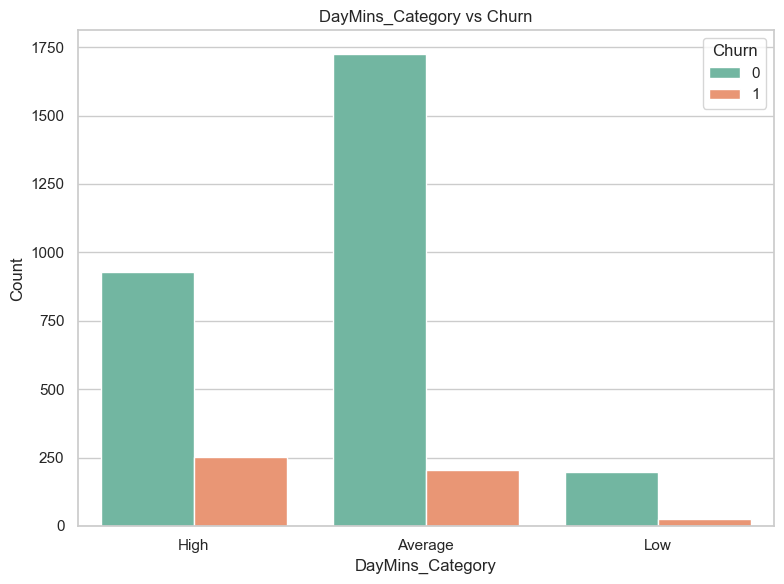

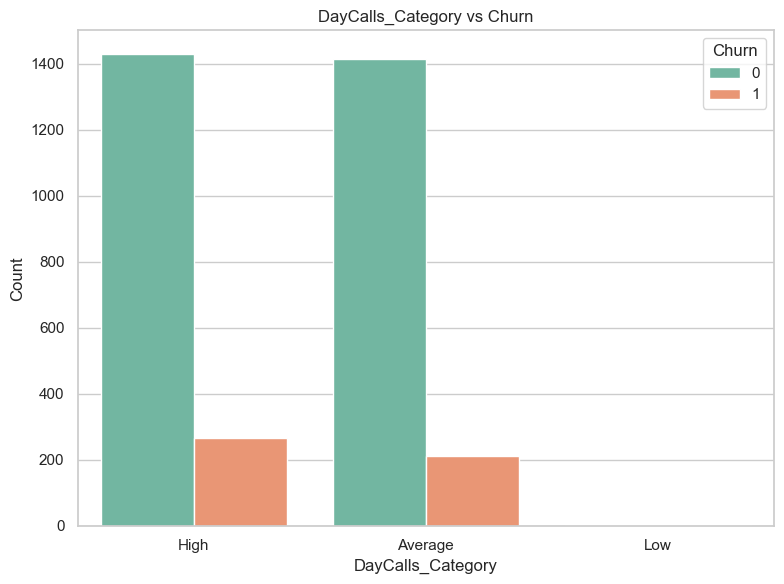

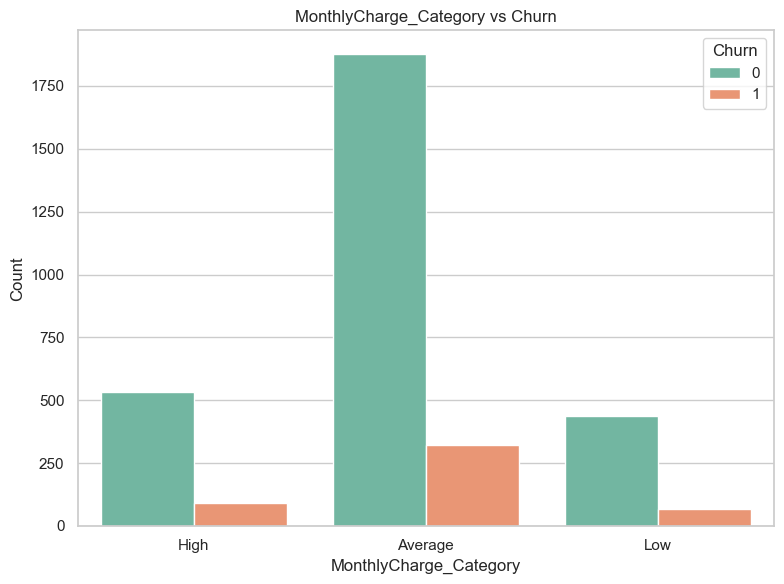

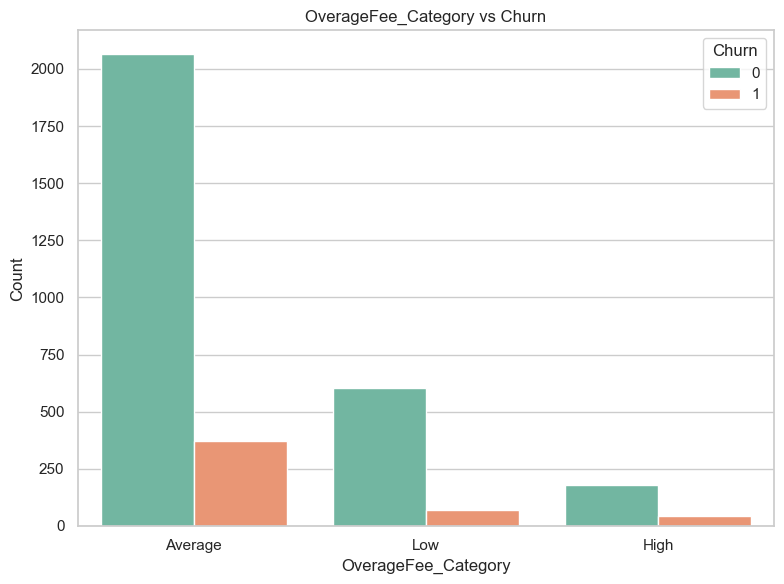

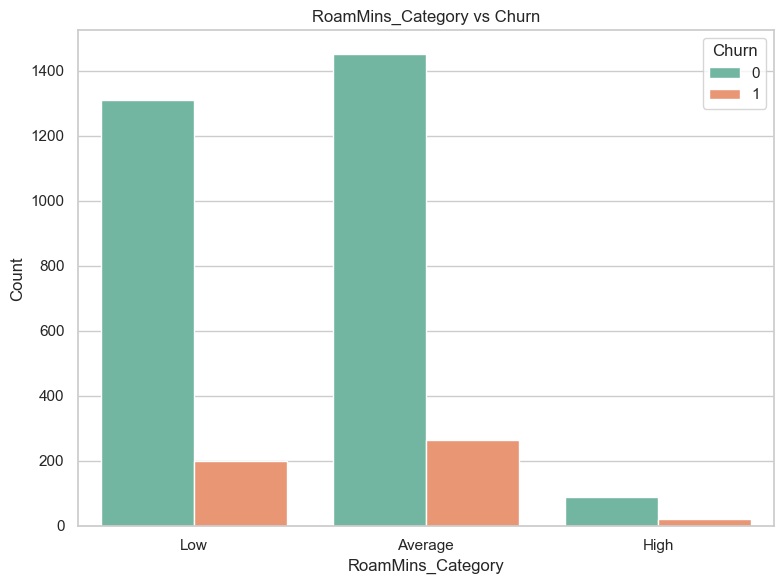

In [50]:
# Set up the plotting configuration
plt.figure(figsize=(8, 6))

# Define the list of newly created categorical columns
categorical_columns = ['DayMins_Category', 'DayCalls_Category', 'MonthlyCharge_Category', 
                       'OverageFee_Category', 'RoamMins_Category']

# Iterate over each categorical column and create bar plots
for column in categorical_columns:
    # Create a new plot for each categorical column
    plt.figure(figsize=(8, 6))
    
    # Plot the countplot for the current categorical column
    sns.countplot(x=column, hue='Churn', data=df_churn, palette='Set2')
    plt.title(f'{column} vs Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')

    plt.tight_layout()
    plt.show()

###  Interppretation of all variables by churn

- DayMins_Category vs Churn - 
   - The bar chart highlights a varying churn rate based on the categorization of daytime minutes, with customers in the High category exhibiting the lowest churn rate, followed by the Average category, and the highest churn rate observed among customers in the Low category.

- DayCalls_Category vs Churn - 
   - The bar chart demonstrates a consistent trend where the churn rate remains relatively low across all categories of daytime calls, with a slightly higher churn rate observed for customers with a High or Average number of daytime calls compared to those with a Low number of daytime calls.

- MonthlyCharge_Category vs Churn - 
   - We observe that the churn rate remains consistent across the High, Average, and Low ranges. While the total count of customers with Average monthly charges is higher, the churn rate percentage remains nearly uniform across all categories. This indicates that regardless of the monthly charge category, the likelihood of churn among customers is relatively stable.

- OverageFee_Category vs Churn -  
   - In the OverageFee_Category analysis, we observe varying churn rates across different fee categories. While the Low category shows the lowest churn rate, the High category exhibits the highest churn rate, suggesting potential differences in customer retention based on fee levels.

- RoamMins_Category vs Churn - 
   - In the RoamMins_Category analysis, we observe that customers with low roaming minutes tend to have a significantly lower churn rate compared to those with average or high roaming minutes. This indicates that higher usage of roaming services may correlate with higher churn rates among customers.

## b. Model Preperation

In [53]:
print(df_churn.dtypes)

Churn                                  int64
AccountWeeks                           int64
ContractRenewal                        int64
DataPlan                               int64
DataUsage                            float64
CustServCalls                          int64
DayMins                              float64
DayCalls                               int64
MonthlyCharge                        float64
OverageFee                           float64
RoamMins                             float64
DayMins_MonthlyCharge_Ratio          float64
DayMins_DayCalls_Product             float64
DayMins_MonthlyCharge_Ratio_Bins    category
DayMins_DayCalls_Product_Bins       category
DayMins_Category                      object
DayCalls_Category                     object
MonthlyCharge_Category                object
OverageFee_Category                   object
RoamMins_Category                     object
dtype: object


### 1. Logistic Regression Model

In [57]:
cont=df_churn.select_dtypes(include=np.number)
cont.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins', 'DayMins_MonthlyCharge_Ratio', 'DayMins_DayCalls_Product'],
      dtype='object')

In [60]:
# Define the features (X) and target variable (y)
X = cont.drop('Churn', axis=1)
y = cont['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression model on the training data
logistic_model.fit(X_train, y_train)

# Evaluate the model
train_score = logistic_model.score(X_train, y_train)
test_score = logistic_model.score(X_test, y_test)

print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)

Train Accuracy: 0.8593398349587397
Test Accuracy: 0.856071964017991


Confusion Matrix:
[[558   8]
 [ 88  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       566
           1       0.62      0.13      0.21       101

    accuracy                           0.86       667
   macro avg       0.74      0.56      0.57       667
weighted avg       0.83      0.86      0.81       667


AUC: 0.7704929503551061


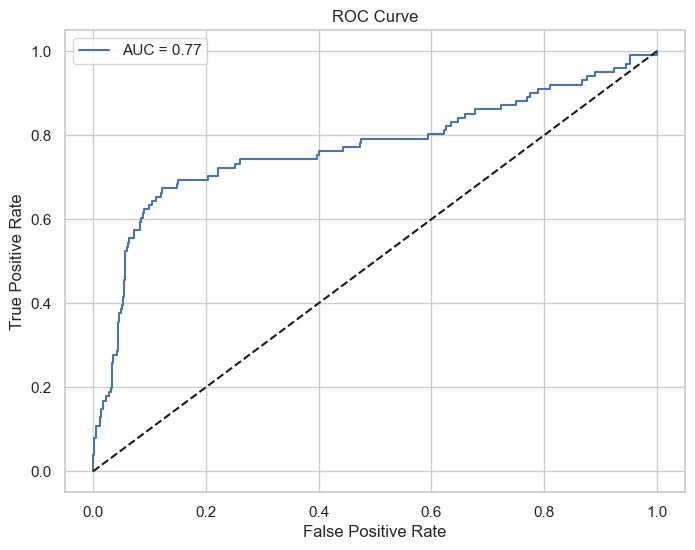

In [61]:
# Predictions on test set
y_pred = logistic_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# ROC Curve and AUC
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print("\nAUC:", auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Interpretation of Logistic interpretation

- The confusion matrix shows that out of 667 samples, the model correctly predicted 558 instances of non-churn (0) and 13 instances of churn (1), but misclassified 88 instances of churn as non-churn and 8 instances of non-churn as churn.

- The classification report provides additional metrics: precision (0.86 for non-churn and 0.62 for churn), recall (0.99 for non-churn and 0.13 for churn), and F1-score (0.92 for non-churn and 0.21 for churn), indicating the model's performance for each class.

- The overall accuracy of the model is 86%, and the Area Under the Curve (AUC) is 0.77, suggesting moderate predictive performance. However, the model's recall for churn (1) is relatively low, indicating that it may struggle to correctly identify churn instances, which could be crucial for business decisions.

## C. Significant Variables

In [71]:
import statsmodels.api as sm

# Assuming you have trained a logistic regression model named logistic_model
# Add a constant term to the independent variables
X_train_constant = sm.add_constant(X_train)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_constant)
result = logit_model.fit()

# Get the summary of the logistic regression model
summary = result.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.348980
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2653
Method:                           MLE   Df Model:                           12
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.1507
Time:                        21:31:54   Log-Likelihood:                -930.38
converged:                       True   LL-Null:                       -1095.4
Covariance Type:            nonrobust   LLR p-value:                 2.226e-63
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           6.9627      1.676      4.154      0.000   

### Interpretation of Significant Features - 

- The significant variables in the logistic regression model are those with p-values less than 0.05. These variables are crucial in predicting churn. In this output, the variables "ContractRenewal," "DayMins," "MonthlyCharge," "RoamMins," and "DayMins_MonthlyCharge_Ratio" have p-values less than 0.05, indicating that they are statistically significant predictors of churn.

### 2. Decision Tree

Confusion Matrix:
[[515  51]
 [ 48  53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       566
           1       0.51      0.52      0.52       101

    accuracy                           0.85       667
   macro avg       0.71      0.72      0.71       667
weighted avg       0.85      0.85      0.85       667


AUC: 0.7173232340901935


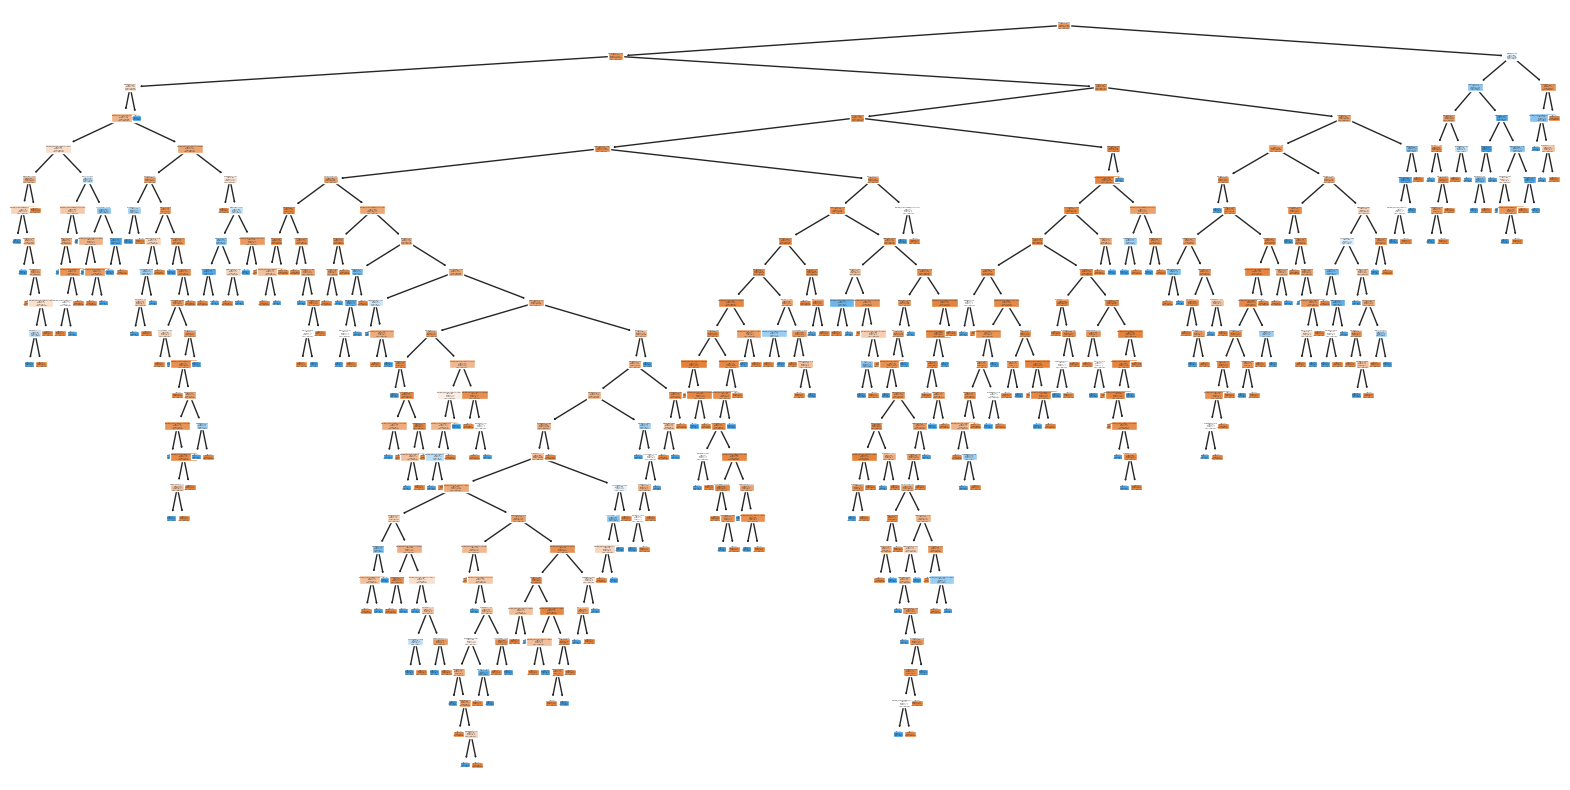

In [66]:

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
decision_tree_model.fit(X_train, y_train)

# Predictions on test set
y_pred = decision_tree_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# ROC Curve and AUC
y_pred_prob = decision_tree_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print("\nAUC:", auc)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, feature_names=X_train.columns, class_names=['Not Churn', 'Churn'], filled=True)
plt.show()

### Interpretation of Decision Tree

- The model accurately predicts non-churn instances most of the time, with a precision and recall of 91%.
- However, it struggles to identify churn instances effectively, as indicated by lower precision and recall scores (51% and 52% respectively).
- The overall accuracy of the model is 85%, with an AUC of 0.72, indicating moderate predictive performance.

### 3. Random Forest

In [67]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.9115442278860569
Confusion Matrix:
[[558   8]
 [ 51  50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       566
           1       0.86      0.50      0.63       101

    accuracy                           0.91       667
   macro avg       0.89      0.74      0.79       667
weighted avg       0.91      0.91      0.90       667



                        Feature  Importance
7                 MonthlyCharge    0.138509
5                       DayMins    0.136036
10  DayMins_MonthlyCharge_Ratio    0.100082
11     DayMins_DayCalls_Product    0.099656
8                    OverageFee    0.097711
9                      RoamMins    0.095537
1               ContractRenewal    0.072050
0                  AccountWeeks    0.071984
6                      DayCalls    0.071900
3                     DataUsage    0.061042
4                 CustServCalls    0.028098
2                      DataPlan    0.027397


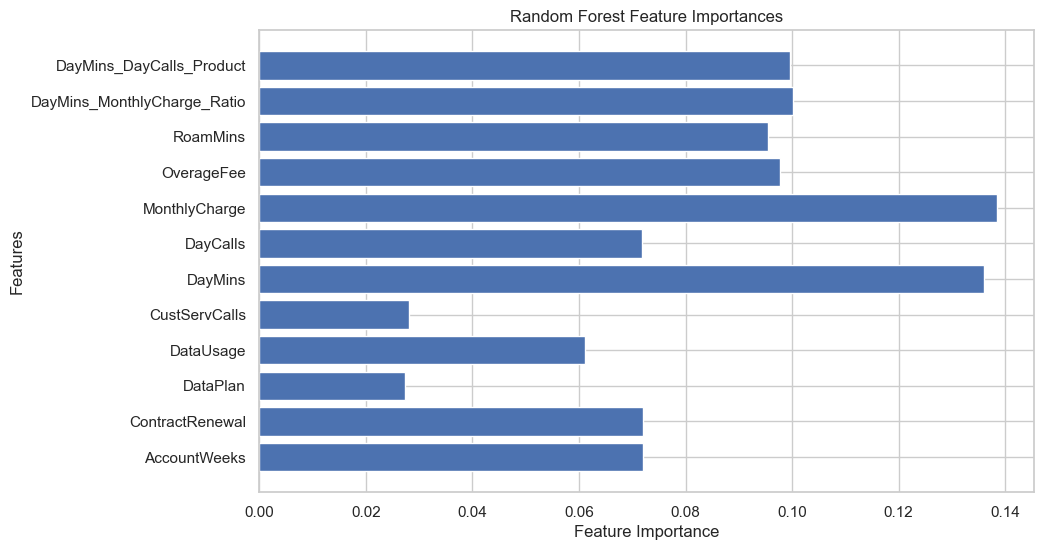

In [73]:
feature_importances = random_forest_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance scores
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.show()

### Interpretation of Random Forest Model - 

- The Random Forest model achieves an impressive accuracy of 91%, indicating that it correctly predicts churn or non-churn instances 91% of the time. It shows strong performance in identifying non-churn instances, with a precision and recall of 92% and 99% respectively.
- However, it struggles slightly in identifying churn instances, with a lower precision of 86% and recall of 50%.
- Overall, the Random Forest model outperforms the logistic regression model in terms of accuracy and predictive power.